# **Drug Discovery Virtual Screening Dataset (dataset is from kaggle)**

In [122]:
pip install scikeras

In [123]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Instead of importing from tensorflow.keras.wrappers.scikit_learn, use:
from scikeras.wrappers import KerasClassifier  # This imports KerasClassifier fromscikeras
from tensorflow.keras.optimizers import SGD

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [126]:
df=pd.read_csv('drug_discovery_virtual_screening.csv')

df.head()

,compound_id,protein_id,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
0,CID_00000,PID_361,499.671415,2.487233,1,7,4,113.350817,4.050696,678,6.019657,0.812534,12.512165,0.736978,14.972288,5.996665,0
1,CID_00001,PID_165,436.173570,3.283222,3,4,4,71.981132,3.704408,876,6.447408,0.651417,11.538420,0.497915,21.168271,6.445742,0
2,CID_00002,PID_168,514.768854,NaN,2,11,11,83.936307,1.869610,658,3.925837,0.633467,13.155702,0.782323,9.074061,5.689583,0
3,CID_00003,PID_226,602.302986,3.038058,0,5,5,79.868125,2.451909,312,7.597056,0.513038,12.071822,1.930458,23.080293,6.043438,0
4,CID_00004,PID_224,426.584663,0.659578,2,4,5,88.198676,1.771936,1418,4.249454,0.613571,15.850448,0.300835,2.802846,4.845055,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   compound_id          2000 non-null   object 
 1   protein_id           2000 non-null   object 
 2   molecular_weight     2000 non-null   float64
 3   logp                 1940 non-null   float64
 4   h_bond_donors        2000 non-null   int64  
 5   h_bond_acceptors     2000 non-null   int64  
 6   rotatable_bonds      2000 non-null   int64  
 7   polar_surface_area   1940 non-null   float64
 8   compound_clogp       2000 non-null   float64
 9   protein_length       2000 non-null   int64  
 10  protein_pi           2000 non-null   float64
 11  hydrophobicity       1940 non-null   float64
 12  binding_site_size    2000 non-null   float64
 13  mw_ratio             2000 non-null   float64
 14  logp_pi_interaction  2000 non-null   float64
 15  binding_affinity     2000 non-null   f

In [128]:
df_new = df[["molecular_weight", "logp", "h_bond_donors","h_bond_acceptors","rotatable_bonds","polar_surface_area","compound_clogp","protein_length","protein_pi","hydrophobicity","binding_site_size","mw_ratio","logp_pi_interaction","binding_affinity","active"]]
df_new.head()

,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
0,499.671415,2.487233,1,7,4,113.350817,4.050696,678,6.019657,0.812534,12.512165,0.736978,14.972288,5.996665,0
1,436.173570,3.283222,3,4,4,71.981132,3.704408,876,6.447408,0.651417,11.538420,0.497915,21.168271,6.445742,0
2,514.768854,NaN,2,11,11,83.936307,1.869610,658,3.925837,0.633467,13.155702,0.782323,9.074061,5.689583,0
3,602.302986,3.038058,0,5,5,79.868125,2.451909,312,7.597056,0.513038,12.071822,1.930458,23.080293,6.043438,0
4,426.584663,0.659578,2,4,5,88.198676,1.771936,1418,4.249454,0.613571,15.850448,0.300835,2.802846,4.845055,0


In [129]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')


<Axes: title={'center': 'Correlation Matrix'}>

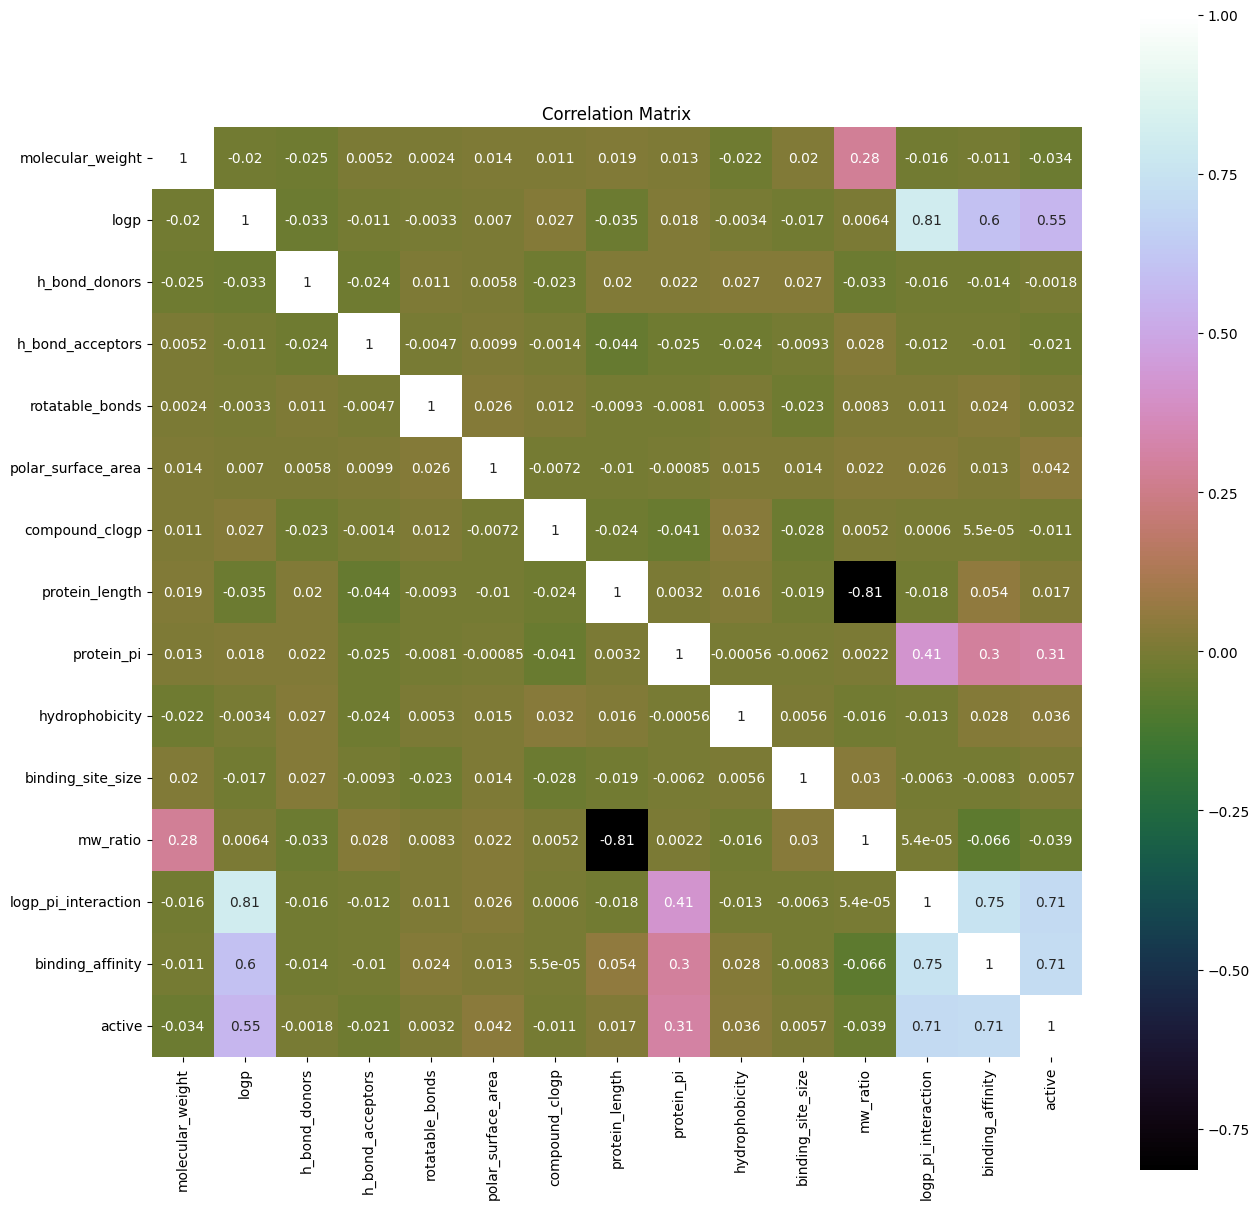

In [130]:
import matplotlib.pyplot as pyplot
correlation = df_new.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

處理缺失值

In [131]:
df_new.isna().sum()
df_new.isna().mean() * 100

,0
molecular_weight,0.0
logp,3.0
h_bond_donors,0.0
h_bond_acceptors,0.0
rotatable_bonds,0.0
polar_surface_area,3.0
compound_clogp,0.0
protein_length,0.0
protein_pi,0.0
hydrophobicity,3.0


In [132]:
df_new = df_new.dropna(subset=["logp"])
df_new = df_new.dropna()

In [133]:
features=["molecular_weight", "logp", "h_bond_donors","h_bond_acceptors","rotatable_bonds","polar_surface_area","compound_clogp","protein_length","protein_pi","hydrophobicity","binding_site_size","mw_ratio","logp_pi_interaction","binding_affinity"]
X = df_new[features]
Y = df_new["active"]

In [134]:
# Ensure all feature names are strings
X.columns = X.columns.astype(str)

# Now you can proceed with the feature selection
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)

# Extract the scores and feature names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate the feature names and their scores
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns

# Print the top 10 features
featureScores.nlargest(10, 'Score').set_index('Specs')

,Score
Specs,
binding_affinity,1847.189664
logp_pi_interaction,1840.014288
logp,854.324533
protein_pi,189.377368
mw_ratio,3.932613
polar_surface_area,3.352375
molecular_weight,3.257152
hydrophobicity,1.543283
protein_length,0.905101


In [135]:
validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [136]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
scoring = 'precision'
scoring = 'recall'
scoring ='neg_log_loss'
scoring = 'roc_auc'

In [137]:
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Neural Network
models.append(('NN', MLPClassifier()))
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

In [138]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.956584 (0.022500)
LDA: 0.986474 (0.008783)
KNN: 0.647630 (0.027531)
CART: 1.000000 (0.000000)
NB: 0.979444 (0.012357)
NN: 0.935475 (0.030869)
AB: 1.000000 (0.000000)
GBM: 1.000000 (0.000000)
RF: 1.000000 (0.000000)


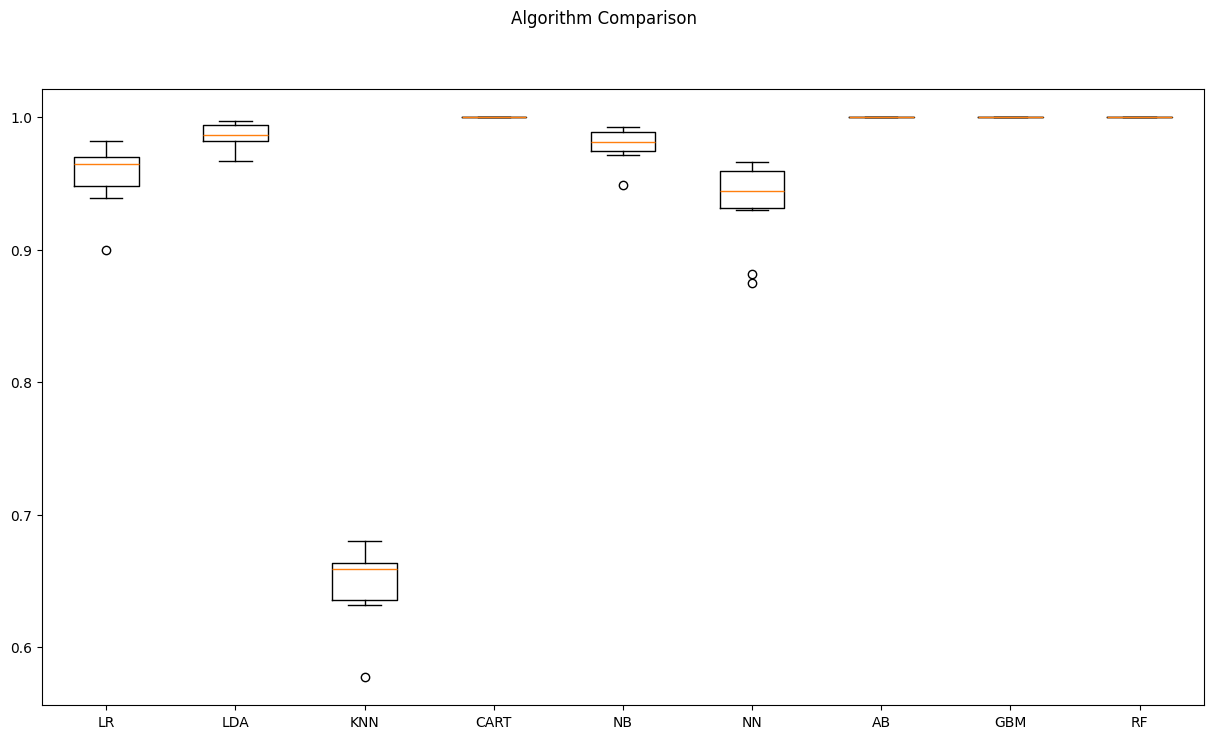

In [139]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

In [140]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, random_state=10, n_jobs=-1, min_samples_leaf = 5)
# Create the model on train dataset
model = clf.fit(X_train, Y_train)
Y_pre = clf.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pre)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

1.0

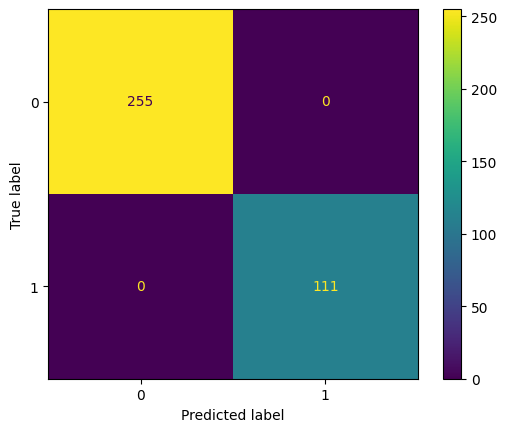

In [141]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [142]:
from sklearn.metrics import recall_score

recall_score(Y_test, Y_pred)
from sklearn.metrics import precision_score

precision_score(Y_test, Y_pred)

1.0

In [143]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200],
    'max_features': [2, 3 ,4],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, Y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.971 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.975 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.967 total time=   0.2s
[CV 1/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=200;, score=0.979 total time=   0.4s
[CV 2/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=200;, score=0.971 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=200;, score=0.971 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=2, min_samples_leaf=2, n_estimators=100;, score=0.982 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=2, min_samples_leaf=2, n_estimators=100;, score=0.959 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=2, 

In [144]:
clf = RandomForestClassifier(max_depth=3,
    n_estimators=200,
    max_features=2,
    min_samples_leaf=2)
# Create the model on train dataset
model = clf.fit(X_train, Y_train)
Y_pre = clf.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pre)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.953551912568306

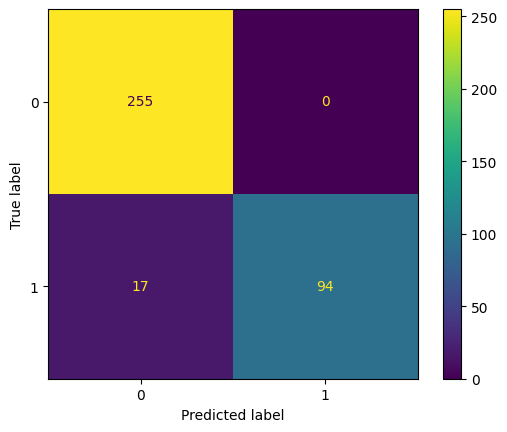

In [145]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [146]:
clf = RandomForestClassifier(
    max_depth=3,
    n_estimators=200,
    max_features=30,
    min_samples_leaf=1,
    random_state=42
)
clf.fit(X_train, Y_train)


predictions_rf = clf.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, predictions_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions_rf))
print("Classification Report:\n", classification_report(Y_test, predictions_rf))
print("Recall Score:", recall_score(Y_test, predictions_rf))
print("Precision Score:", precision_score(Y_test, predictions_rf))

Accuracy: 1.0
Confusion Matrix:
 [[255   0]
 [  0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       111

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366

Recall Score: 1.0
Precision Score: 1.0


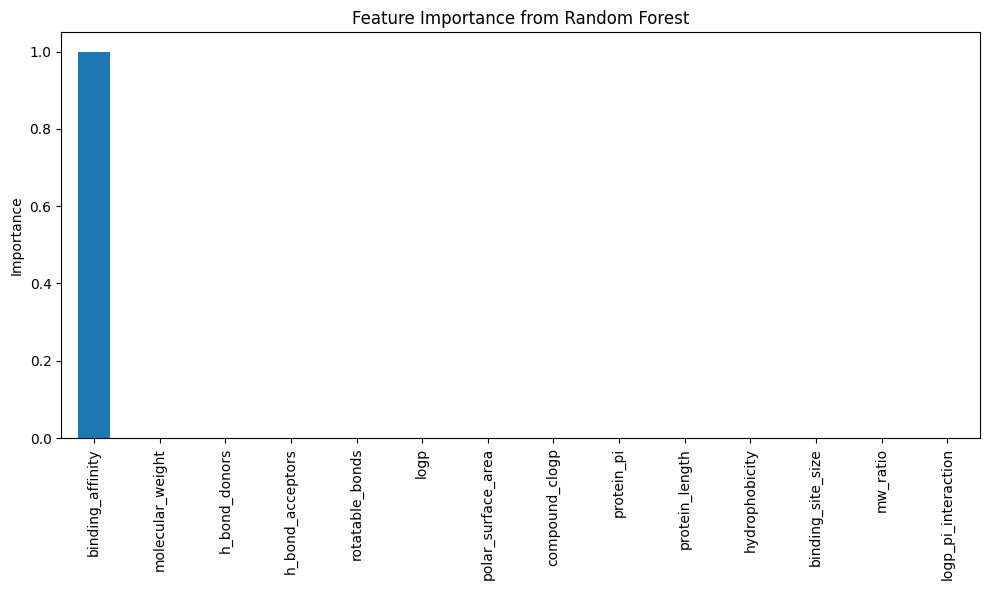

In [147]:
importances = clf.feature_importances_
features = X.columns


feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Deep learning

In [148]:
import os
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
#pip install catboost
from catboost import CatBoostClassifier
from tensorflow import keras
from sklearn.metrics import roc_auc_score, classification_report, recall_score

In [149]:
xgb_model = XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=5,
    subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='logloss'
)

model_xgb.fit(X_train_scaled_xgb, Y_train)

predictions_xgb = model_xgb.predict(X_test_scaled_rf)


print("Accuracy:", accuracy_score(Y_test, predictions_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions_xgb))
print("Classification Report:\n", classification_report(Y_test, predictions_xgb))
print("Recall Score:", recall_score(Y_test, predictions_xgb))
print("Precision Score:", precision_score(Y_test, predictions_xgb))

Accuracy: 1.0
Confusion Matrix:
 [[255   0]
 [  0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       111

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366

Recall Score: 1.0
Precision Score: 1.0


In [150]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score


cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    verbose=0,
    random_state=42
)
cat_model.fit(X_train, Y_train)


predictions_cat = cat_model.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, predictions_cat))
print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions_cat))
print("Classification Report:\n", classification_report(Y_test, predictions_cat))
print("Recall Score:", recall_score(Y_test, predictions_cat))
print("Precision Score:", precision_score(Y_test, predictions_cat))


Accuracy: 0.9918032786885246
Confusion Matrix:
 [[252   3]
 [  0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       255
           1       0.97      1.00      0.99       111

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366

Recall Score: 1.0
Precision Score: 0.9736842105263158


In [151]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score
from tensorflow import keras


scaler = StandardScaler()
X_train_scaled_ffn = scaler.fit_transform(X_train)
X_test_scaled_ffn = scaler.transform(X_test)


ffn_model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


ffn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['AUC', 'Recall']
)


history_ffn = ffn_model.fit(
    X_train_scaled_ffn, Y_train,
    epochs=50,
    batch_size=8,
    verbose=0,
    validation_split=0.2
)


ffn_probs = ffn_model.predict(X_test_scaled_ffn)
ffn_preds = (ffn_probs >= 0.5).astype(int)


print("Accuracy:", accuracy_score(Y_test, ffn_preds))
print("Confusion Matrix:\n", confusion_matrix(Y_test, ffn_preds))
print("Classification Report:\n", classification_report(Y_test, ffn_preds))
print("Recall Score:", recall_score(Y_test, ffn_preds))
print("Precision Score:", precision_score(Y_test, ffn_preds))



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.9644808743169399
Confusion Matrix:
 [[249   6]
 [  7 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       255
           1       0.95      0.94      0.94       111

    accuracy                           0.96       366
   macro avg       0.96      0.96      0.96       366
weighted avg       0.96      0.96      0.96       366

Recall Score: 0.9369369369369369
Precision Score: 0.9454545454545454


In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

scaler = StandardScaler()
X_train_scaled_ffn = scaler.fit_transform(X_train)
X_test_scaled_ffn = scaler.transform(X_test)


ffn_model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1, activation='sigmoid')
])


ffn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['AUC', 'Recall']
)

# EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history_ffn = ffn_model.fit(
    X_train_scaled_ffn, Y_train,
    epochs=200,
    batch_size=32,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stop]
)


ffn_probs = ffn_model.predict(X_test_scaled_ffn)
ffn_preds = (ffn_probs >= 0.5).astype(int)

print("Accuracy:", accuracy_score(Y_test, ffn_preds))
print("Confusion Matrix:\n", confusion_matrix(Y_test, ffn_preds))
print("Classification Report:\n", classification_report(Y_test, ffn_preds))
print("Recall Score:", recall_score(Y_test, ffn_preds))
print("Precision Score:", precision_score(Y_test, ffn_preds))


Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - AUC: 0.6248 - Recall: 0.6328 - loss: 0.7808 - val_AUC: 0.8817 - val_Recall: 0.9897 - val_loss: 0.6559
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8017 - Recall: 0.7971 - loss: 0.6130 - val_AUC: 0.9210 - val_Recall: 1.0000 - val_loss: 0.6526
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8594 - Recall: 0.8847 - loss: 0.5571 - val_AUC: 0.9471 - val_Recall: 1.0000 - val_loss: 0.6309
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8848 - Recall: 0.8703 - loss: 0.4869 - val_AUC: 0.9589 - val_Recall: 1.0000 - val_loss: 0.5921
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9025 - Recall: 0.8887 - loss: 0.4619 - val_AUC: 0.9676 - val_Recall: 1.0000 - val_loss: 0.5395
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.9236 - Recall: 0.9121 - loss: 0.4307 - val_AUC: 0.9719 - val_Recall: 1.0000 - val_loss: 0.4830
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.9351 - Re